In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Car Sales.csv')

In [6]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


Car_id - Unique identifier for each car.
Date - Date of the car sale transaction.
Customer Name - Name of the customer purchasing the car.
Gender - Gender of the customer (e.g., Male, Female).
Annual Income - Annual income of the customer.
Dealer_Name - Name of the car dealer associated with the sale.
Company - Company or brand of the car.
Model - Model name of the car.
Engine - Specifications of the car's engine.
Transmission - Type of transmission in the car (e.g., Automatic, Manual).
Color - Color of the car's exterior.
Price ($) - Price
Dealer_No - Dealer identification number associated with the sale.
Body Style - Style or design of the car's body (e.g., Sedan, SUV).
Phone - Contact phone number associated with the car sale.
Dealer_Region - Geographic region or location of the car dealer.

In [7]:
#переименование столбцов датасета
df = df.rename(columns = lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))
df = df.rename(columns = {'price_($)': 'price'})
df.head(10)

,car_id,date,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,dealer_no_,body_style,phone,dealer_region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
5,C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale
6,C_CND_000007,1/2/2022,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin
7,C_CND_000008,1/2/2022,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,78758-7841,Passenger,6206512,Austin
8,C_CND_000009,1/2/2022,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82000,85257-3102,Hardtop,7194857,Pasco
9,C_CND_000010,1/2/2022,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,DoubleÂ Overhead Camshaft,Auto,Pale White,15000,85257-3102,Passenger,7836892,Scottsdale


In [8]:
#определение размера датасета
df.shape

(23906, 16)

In [9]:
#информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_id         23906 non-null  object
 1   date           23906 non-null  object
 2   customer_name  23905 non-null  object
 3   gender         23906 non-null  object
 4   annual_income  23906 non-null  int64 
 5   dealer_name    23906 non-null  object
 6   company        23906 non-null  object
 7   model          23906 non-null  object
 8   engine         23906 non-null  object
 9   transmission   23906 non-null  object
 10  color          23906 non-null  object
 11  price          23906 non-null  int64 
 12  dealer_no_     23906 non-null  object
 13  body_style     23906 non-null  object
 14  phone          23906 non-null  int64 
 15  dealer_region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [10]:
#опреление типов данных
df.dtypes

car_id           object
date             object
customer_name    object
gender           object
annual_income     int64
dealer_name      object
company          object
model            object
engine           object
transmission     object
color            object
price             int64
dealer_no_       object
body_style       object
phone             int64
dealer_region    object
dtype: object

In [11]:
#смена типа данных для столбца с датой
df['date'] = pd.to_datetime(df['date'])

In [12]:
#статистические характеристики числовых столбцов
df.describe()

,date,annual_income,price,phone
count,23906,2.390600e+04,23906.000000,2.390600e+04
mean,2023-03-01 14:28:10.822387456,8.308403e+05,28090.247846,7.497741e+06
min,2022-01-02 00:00:00,1.008000e+04,1200.000000,6.000101e+06
25%,2022-09-20 00:00:00,3.860000e+05,18001.000000,6.746495e+06
50%,2023-03-13 00:00:00,7.350000e+05,23000.000000,7.496198e+06
75%,2023-09-08 00:00:00,1.175750e+06,34000.000000,8.248146e+06
max,2023-12-31 00:00:00,1.120000e+07,85800.000000,8.999579e+06
std,NaN,7.200064e+05,14788.687608,8.674920e+05


In [13]:
#статистические характеристики остальных столбцов
df.describe(include = 'object')

,car_id,customer_name,gender,dealer_name,company,model,engine,transmission,color,dealer_no_,body_style,dealer_region
count,23906,23905,23906,23906,23906,23906,23906,23906,23906,23906,23906,23906
unique,23906,3021,2,28,30,154,2,2,3,7,5,7
top,C_CND_023906,Thomas,Male,Progressive Shippers Cooperative Association No,Chevrolet,Diamante,DoubleÂ Overhead Camshaft,Auto,Pale White,85257-3102,SUV,Austin
freq,1,92,18798,1318,1819,418,12571,12571,11256,3814,6374,4135


In [14]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*100)

car_id
['C_CND_000001' 'C_CND_000002' 'C_CND_000003' ... 'C_CND_023904'
 'C_CND_023905' 'C_CND_023906']
----------------------------------------------------------------------------------------------------
customer_name
['Geraldine' 'Gia' 'Gianna' ... 'Pol' 'Teho' 'Djamel Epoine']
----------------------------------------------------------------------------------------------------
gender
['Male' 'Female']
----------------------------------------------------------------------------------------------------
dealer_name
["Buddy Storbeck's Diesel Service Inc" 'C & M Motors Inc' 'Capitol KIA'
 'Chrysler of Tri-Cities' 'Chrysler Plymouth' 'Classic Chevy'
 'Clay Johnson Auto Sales' 'U-Haul CO' 'Rabun Used Car Sales'
 'Race Car Help' 'Saab-Belle Dodge' 'Scrivener Performance Engineering'
 'Diehl Motor CO Inc' 'Star Enterprises Inc' 'Suburban Ford'
 'Tri-State Mack Inc' 'Progressive Shippers Cooperative Association No'
 'Ryder Truck Rental and Leasing' 'Enterprise Rent A Car'
 'Gartner Buick Hyund

In [16]:
#удаление столбцов "customer_name","phone" и "dealer_no"(соответствует региону диллера) из-за неинформативности для анализа

df.drop(['phone', 'dealer_no_', 'customer_name'], axis=1, inplace=True)
df

,car_id,date,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,body_style,dealer_region
0,C_CND_000001,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,C_CND_000002,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,C_CND_000003,2022-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,C_CND_000004,2022-01-02,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,C_CND_000005,2022-01-02,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,2023-12-31,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,Pasco
23902,C_CND_023903,2023-12-31,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown
23903,C_CND_023904,2023-12-31,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale
23904,C_CND_023905,2023-12-31,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,Passenger,Austin


In [17]:
#определение количества нулевых значений в столбцах
df.isnull().sum()

car_id           0
date             0
gender           0
annual_income    0
dealer_name      0
company          0
model            0
engine           0
transmission     0
color            0
price            0
body_style       0
dealer_region    0
dtype: int64

In [18]:
df.date.value_counts()

date
2023-09-05    190
2023-11-10    175
2023-12-29    151
2023-12-11    140
2023-11-24    135
             ... 
2022-05-09      5
2022-05-11      5
2023-09-28      5
2022-01-26      5
2022-01-24      5
Name: count, Length: 612, dtype: int64

In [19]:
#создание новых столбцов
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
df

,car_id,date,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,body_style,dealer_region,month,year
0,C_CND_000001,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,1,2022
1,C_CND_000002,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,1,2022
2,C_CND_000003,2022-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,1,2022
3,C_CND_000004,2022-01-02,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,1,2022
4,C_CND_000005,2022-01-02,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,2023-12-31,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,Pasco,12,2023
23902,C_CND_023903,2023-12-31,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown,12,2023
23903,C_CND_023904,2023-12-31,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale,12,2023
23904,C_CND_023905,2023-12-31,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,Passenger,Austin,12,2023


In [20]:
df_pivot = df.pivot_table(index='month',
               columns='year',
               aggfunc={'date': 'count'},
               fill_value=0)
df_pivot

date      
year   2022  2023
month            
1       315   475
2       320   415
3       705   830
4       800   855
5       750  1145
6       690  1025
7       700  1025
8       810   895
9      1475  1830
10      835   995
11     1620  1850
12     1625  1921

<Figure size 640x480 with 0 Axes>

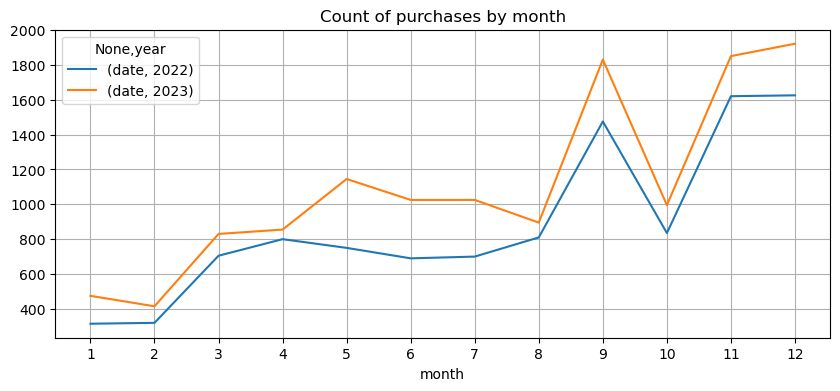

In [21]:
plt.figure()

df_pivot.plot(title = 'Сount of purchases by month', figsize=(10, 4))
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.grid(True)

Очевидна положительная динамика по количеству покупок авто в 2023 году относительно каждого месяца предыдущего года. Минимальное количество продаж было в январе 2022 года, максимальное - в декабре 2023 года. 
Можно отметить также определённую сезонность приобретения авто: значительный рост количества продаж - в сентябре и в период ноябрь-декабре, спад продаж - в период январь-февраль. 

In [154]:
df_pivot2 = df.pivot_table(index='month',
               columns='year',
               aggfunc={'price': 'sum'},
               fill_value=0)
df_pivot2

price          
year       2022      2023
month                    
1       8931920  12764298
2       8795365  11848580
3      19502059  22203814
4      22748867  24115567
5      20608086  32613157
6      19604211  28901691
7      19935002  28243030
8      23631362  25162276
9      42218216  51416962
10     23991509  28043756
11     45389290  51590388
12     44984458  54281601

<Figure size 640x480 with 0 Axes>

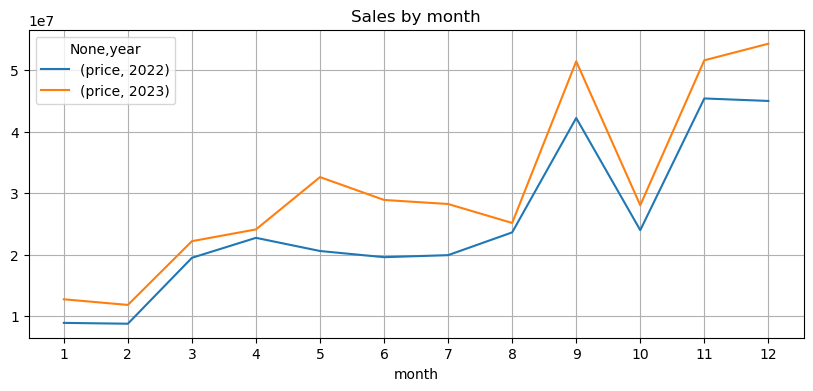

In [155]:
plt.figure()

df_pivot2.plot(title = 'Sales by month', figsize=(10, 4))
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.
plt.grid(True)

Распределение дохода по месяцам 2022-2023 гг. точно такое же как и распределение по количеству проданных авто. Тенденция положительного роста продаж в 2023 году сохраняется.

<Axes: xlabel='annual_income'>

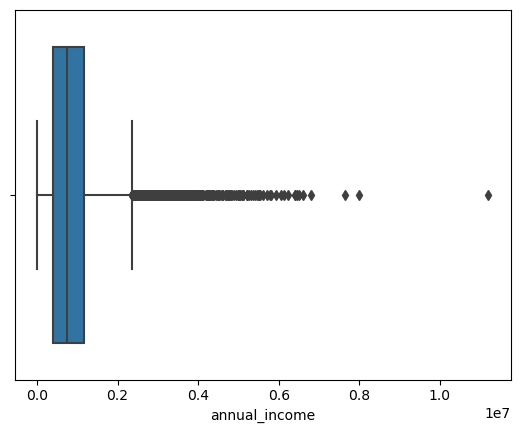

In [283]:
sns.boxplot(data=df,x='annual_income')

In [285]:
df.annual_income.median()

735000.0

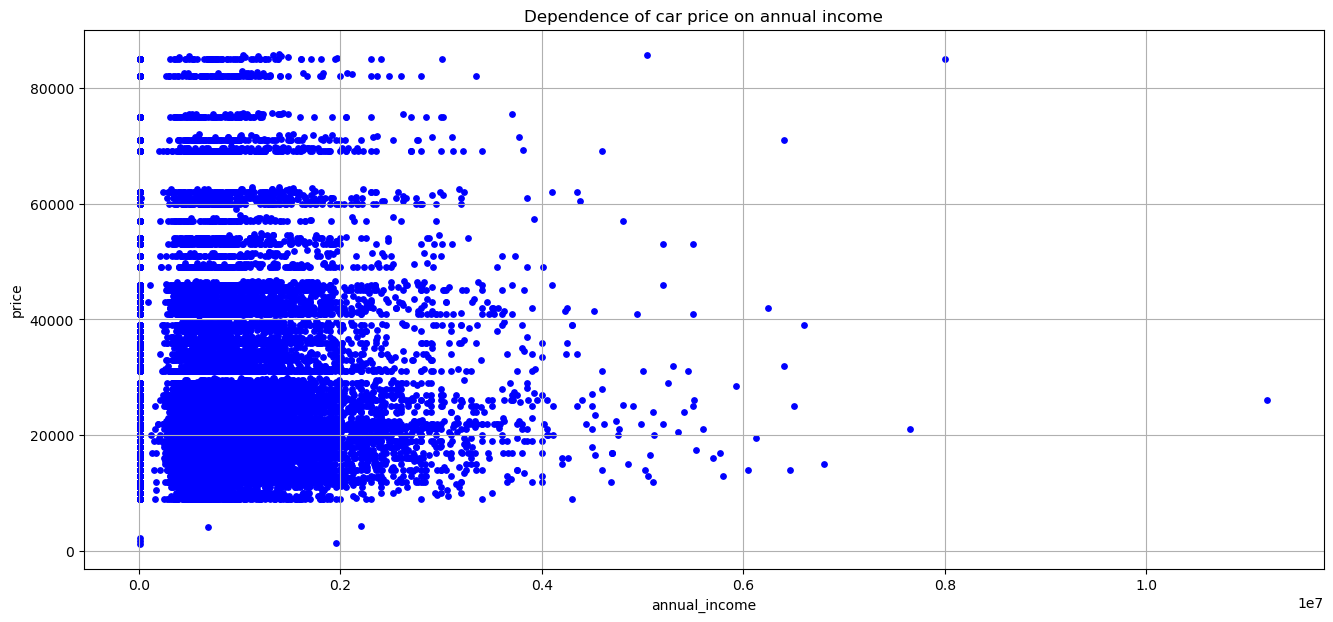

In [190]:
#зависимость годового дохода покупателя и стоимости авто.
df[df['annual_income']>].plot.scatter(x="annual_income", y="price", title = 'Dependence of car price on annual income', s= 15 , c='blue', figsize=(16, 7),)
plt.grid(True)

Явной зависимости стоимости покупаемого автомобиля от годового дохода покупателя не замечено. 
Можно отметить, что превалирующая часть покупателей имеют годовой доход до 200 тыс.долл, при этом они покупают, как правило, авто стоимостью в диапазоне от 8 000 до 47 000 долл. При этом имеются аномалии: есть часть покупателей с доходом в районе 10 тыс. долл, но покупающих авто стоимостью в довольно широком диапазоне - от 1200 до 85 000 долл. А покупатель с наибольшим годовым доходом (11,2 млн.долл) купил авто стоимостью всего 26 тыс. долл.

In [167]:
df.annual_income.min()

10080

In [168]:
df.price.min()

1200

In [169]:
df.annual_income.max()

11200000

In [187]:
df[df['annual_income'] == 11200000].price

14026    26001
Name: price, dtype: int64

In [75]:
#определение количества продаж в разрезе пола
df.gender.value_counts()

gender
Male      18797
Female     5108
Name: count, dtype: int64

In [81]:
#определение количества купленных авто в разрезе пола покупателя.
df_gender = df.groupby('gender').agg({'car_id': 'count'}).sort_values('gender', ascending = True)

Text(0, 0.5, '')

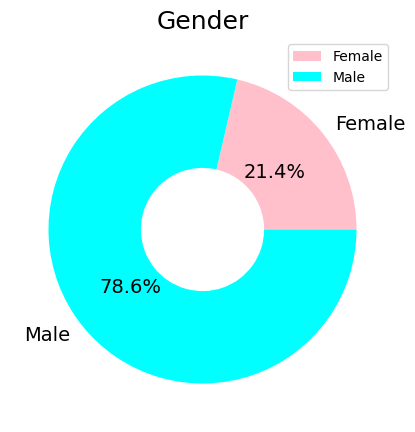

In [214]:
#соотношение покупок, совершаемых женщинами и мужчинами
df_gender.plot.pie(subplots=True, colors=["pink", "aqua"], autopct="%1.1f%%", fontsize=14, figsize=(5, 5),wedgeprops=dict(width=0.6))
plt.title('Gender', fontsize=18)
plt.ylabel('')

Как не странно, чаще покупают автомобили мужчины. Только каждая пятая покупка совершается женщинами.

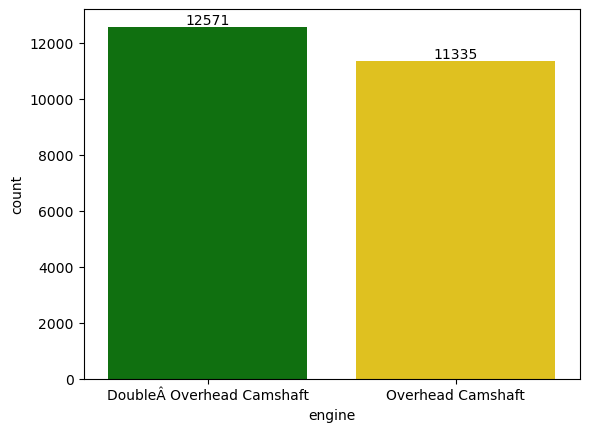

In [238]:
#определение соотношения типов двигателей
ax = sns.countplot(data=df,x='engine', palette= ['green','gold'])
for label in ax.containers:
    ax.bar_label(label)

In [ ]:
Чаще покупают авто с типом двигателя DOHS, или «двойной верхний распределительный вал». DOHC — двигатель, в котором для привода клапанов используется сразу два распределительных вала.

Text(0, 0.5, '')

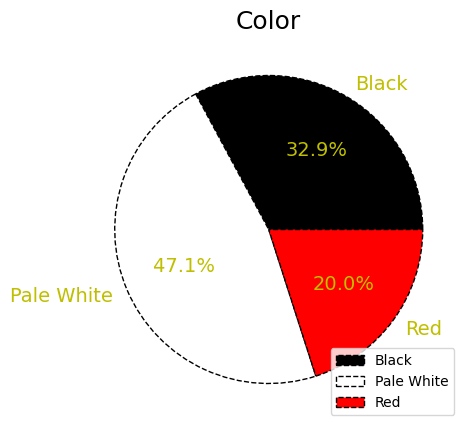

In [233]:
#соотношение покупаемых авто по цветам кузова
df_color = df.groupby('color').agg({'car_id': 'count'})
df_color.plot.pie(subplots=True, colors=["black", "white", "red"], autopct="%1.1f%%", fontsize=14, figsize=(5, 5), wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, textprops={'color':"y"})
plt.title('Color', fontsize=18)
plt.ylabel('')

Почти половина покупателей продпочитает белый цвет авто.

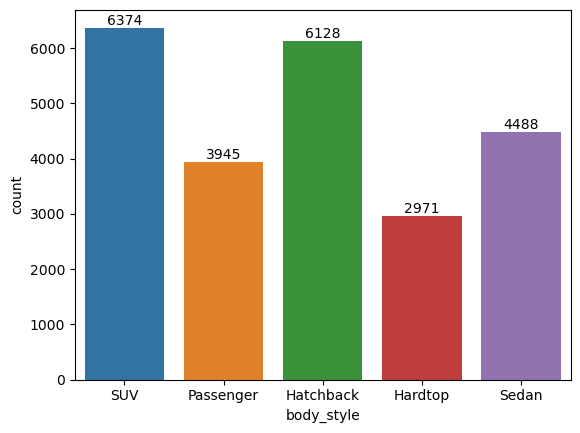

In [236]:
#выявление предпочтений покупателей по типу кузова
ax=sns.countplot(data=df,x= 'body_style')
for label in ax.containers:
    ax.bar_label(label)

Чаще всего покупатели выбирают внедорожники. Наименьшей популярностью пользуются хардтопы - это седан или купе без центральной стойки кузова и дверных рамок.

Text(0, 0.5, '')

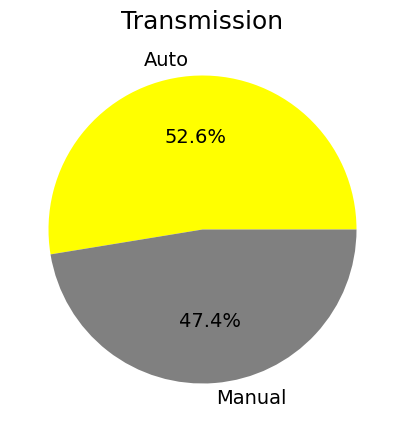

In [24]:
#соотношение покупок, совершаемых женщинами и мужчинами
df.transmission.value_counts().plot.pie(subplots=True, colors=["yellow", "grey"], autopct="%1.1f%%", fontsize=14, figsize=(5, 5))
plt.title('Transmission', fontsize=18)
plt.ylabel('')

In [ ]:
Большинство покупателей предпочитают автомобили "на автомате".

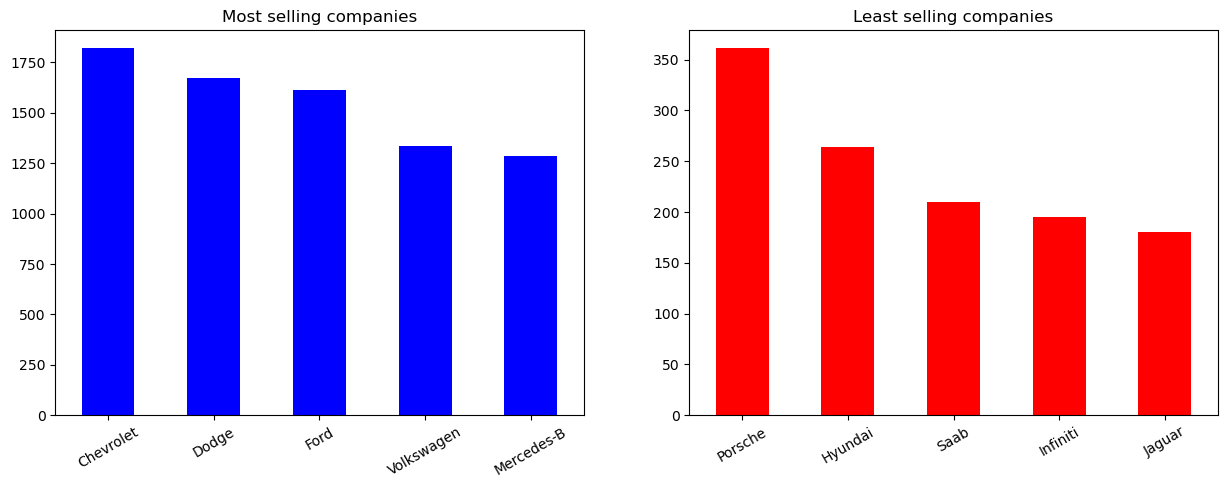

In [69]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

top_companies=df.company.value_counts().head(5)
unpopular_companies=df.company.value_counts().tail(5)

top_companies.plot(kind='bar',color='b',ax=ax[0])
ax[0].set_title('Most selling companies')
ax[0].set_ylabel('Count')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
plt.sca(ax[0])
plt.xticks(rotation=30)

unpopular_companies.plot(kind='bar',color='r',ax=ax[1])
ax[1].set_title('Least selling companies')
ax[1].set_ylabel('Count')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.sca(ax[1])
plt.xticks(rotation=30)

plt.show()

In [59]:
def calc(company):
    x=df['company']==company
    models=df[x]['model'].value_counts()
    length=len(cars[x])
    percantage=[(models[i]*100)/length for i in models.keys()]

    plt.figure(figsize=(20,8))
    plt.bar(x=models.keys(),height=percantage)
    plt.title(f"Percentge of each model of sales '{company}' ")
    plt.ylabel('Percntge %')
    plt.xlabel('Company Models ')
    plt.xticks(models.keys(),rotation=45)
    plt.show()

In [ ]:
for i in top_companies.keys():
    calc(i)

In [122]:
df.dealer_region.value_counts()

dealer_region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3129
Greenville    3128
Middletown    3128
Name: count, dtype: int64

In [ ]:
Больше всего диллеров в регионе Austin (4135 дилееров).

<Axes: ylabel='company,model'>

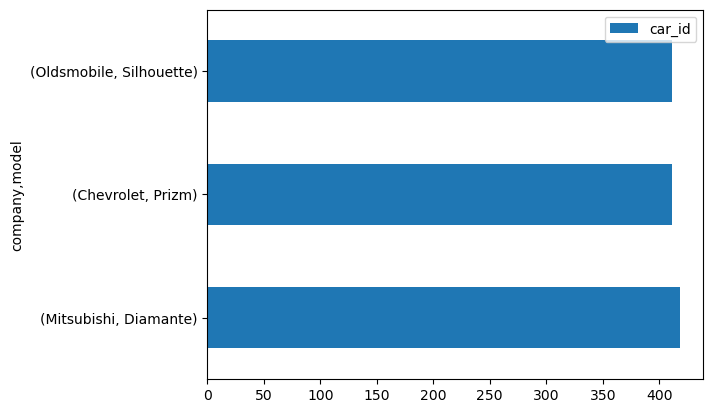

In [67]:
top10_model = df.groupby(['company', 'model']).agg({'car_id': 'count'}).sort_values(by = 'car_id',ascending = False).head(3)
top10_model.plot(kind = 'barh')